In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('F:/Рабочий стол/Airbnb_Project/Airbnb_Open_Data.csv', low_memory = False)
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [6]:
df.shape

(102599, 26)

### Обработка 

In [7]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  boolean
 12  cancellation_pol

In [10]:
pd.set_option('display.max_columns', None)
df.head(3)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


### Конвертируем instant_bookable в boolean

In [11]:
df['instant_bookable'] = df['instant_bookable'].astype('boolean')

### Конвертация в Int64

In [12]:
to_int = ['construction_year', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
         'review_rate_number', 'availability_365']

for column in to_int:
    df[column] = df[column].astype('Int64')

### Уберем знак доллара и запятые

In [17]:
df.price = df.price.str.strip('$').str.strip().str.replace(',','').astype('float64')
df.service_fee = df.service_fee.str.strip('$').str.strip().str.replace(',','').astype('float64')

### Конвертируем last_review в формат datetime

In [18]:
df['last_review'] = pd.to_datetime(df.last_review, format = '%m/%d/%Y', errors = 'raise')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host_name                       102193 non-null  object        
 5   neighbourhood_group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country_code                    102468 non-null  object 

### Проверим на дубликаты и удалим их

In [22]:
df.duplicated().sum()

541

In [23]:
df = df.drop_duplicates()

In [24]:
df.describe()

,id,host_id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.0,101811.000000,101785.000000,101658.0,101875.0,86240.000000,101739.0,101739.0,101610.0
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.48809,625.355580,125.039249,8.12664,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,331.672649,66.325905,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.0,50.000000,10.000000,-1223.0,0.0,0.010000,1.0,1.0,-10.0
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.0,340.000000,68.000000,2.0,1.0,0.220000,2.0,1.0,3.0
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.0,625.000000,125.000000,3.0,7.0,0.740000,3.0,1.0,96.0
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.0,913.000000,183.000000,5.0,31.0,2.010000,4.0,2.0,268.0
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.0,1024.0,90.000000,5.0,332.0,3677.0


### Проверим на выбросы minimum_nights и availability_365

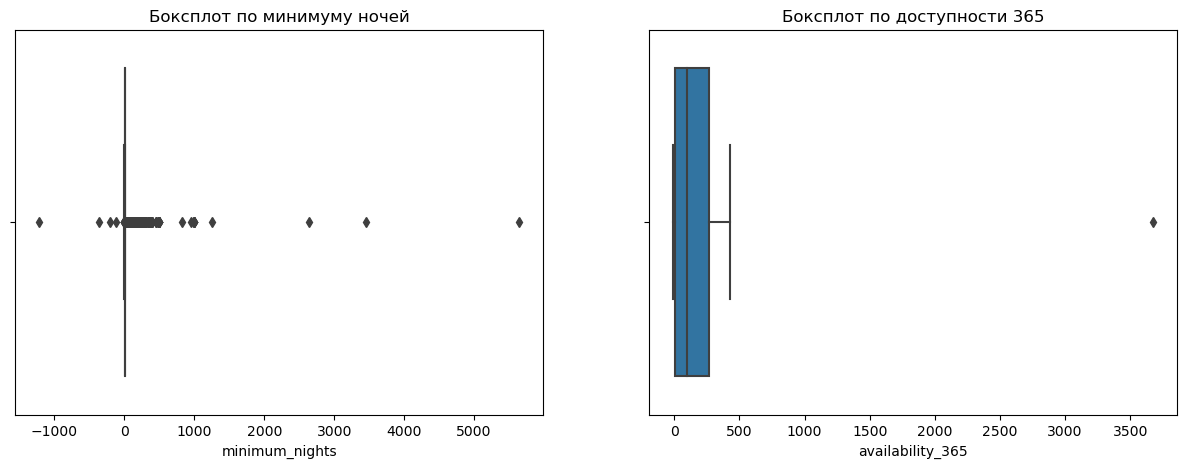

In [25]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].set_title('Боксплот по минимуму ночей');
sns.boxplot(x = df['minimum_nights'], ax = ax[0]);

ax[1].set_title('Боксплот по доступности 365');
sns.boxplot(x = df['availability_365'], ax = ax[1]);

###### Минимальное количество ночей проживания не может быть отрицательным, а доступность в течение одного года не может превышать 366 дней. Поэтому необходимо удалить эти строки.

In [26]:
df = df.drop(df[df.minimum_nights < 1].index)

df['minimum_nights'].min()

1

In [27]:
df = df.drop(df[df.availability_365 > 365].index)

df['availability_365'].max()

365

### Проверка категориальных признаков на уникальные значения

In [29]:
cat_features = df.select_dtypes(include = 'object')
cat_features.nunique()

name                      59677
host_identity_verified        2
host_name                 12985
neighbourhood_group           7
neighbourhood               224
country                       1
country_code                  1
cancellation_policy           3
room_type                     4
house_rules                1970
license                       1
dtype: int64

In [33]:
print(f'host_identity_verified имеет уникальные значения {df["host_identity_verified"].unique()}')
print(f'host_identity_verified имеет уникальные значения {df["neighbourhood_group"].unique()}')
print(f'host_identity_verified имеет уникальные значения {df["cancellation_policy"].unique()}')
print(f'host_identity_verified имеет уникальные значения {df["room_type"].unique()}')

host_identity_verified имеет уникальные значения ['unconfirmed' 'verified' nan]
host_identity_verified имеет уникальные значения ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
host_identity_verified имеет уникальные значения ['strict' 'moderate' 'flexible' nan]
host_identity_verified имеет уникальные значения ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [35]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace(['brookln','manhatan'], ['Brooklyn', 'Manhattan'])

### Работа с пропущенными значениями

In [37]:
round(df.isnull().sum()*100/len(df),2).sort_values()

id                                  0.00
room_type                           0.00
host_id                             0.00
long                                0.01
lat                                 0.01
neighbourhood                       0.01
neighbourhood_group                 0.03
cancellation_policy                 0.06
instant_bookable                    0.09
country_code                        0.12
number_of_reviews                   0.18
construction_year                   0.20
price                               0.24
name                                0.24
service_fee                         0.27
host_identity_verified              0.28
calculated_host_listings_count      0.30
review_rate_number                  0.31
minimum_nights                      0.39
host_name                           0.40
availability_365                    0.45
country                             0.52
reviews_per_month                  15.42
last_review                        15.43
house_rules     

In [38]:
# Столбцы "license" и "house_rules" содержат более 50% пропущенных значений, 
# поэтому удалим их.
df = df.drop(columns = ['house_rules', 'license'])

In [39]:
# Удалите пропущенные строки для "lat" и "long", 
# поскольку они не могут быть пересчитаны
df = df[df.lat.notnull()]

In [43]:
missing_borough = df[df['neighbourhood_group'].isna()]

neighbourhood_list = missing_borough['neighbourhood'].unique()
neighbourhood_list

array(['Washington Heights', 'Clinton Hill', 'East Village',
       'Upper East Side', 'Woodside', 'Williamsburg', 'Bushwick',
       'Prospect Heights', 'Chelsea', 'East Harlem', 'Eastchester',
       'Harlem', 'Chinatown', 'Queens Village', 'Bedford-Stuyvesant',
       'Upper West Side'], dtype=object)

In [45]:
manhattan_neighbourhoods = ['Washington Heights', 'East Village', 'Upper East Side', 'Chelsea', 'East Harlem']

brooklyn_neighbourhoods = ['Clinton Hill', 'Williamsburg', 'Bushwick', 'Prospect Heights', 'Bedford-Stuyvesant']

queens_neighbourhoods = ['Woodside', 'Queens Village']

bronx_neighbourhoods = ['Eastchester']

In [46]:
#Создает функцию для замены пропущенных значений для района 
# в соответствии с окрестностями
def name_borough(list_neighbourhoods, borough):
    for i in list_neighbourhoods:
        df['neighbourhood_group'] = np.where((df['neighbourhood'] == i), 
                                             borough, df['neighbourhood_group'])

In [47]:
name_borough(manhattan_neighbourhoods, 'Manhattan')
name_borough(manhattan_neighbourhoods, 'Brooklyn')
name_borough(manhattan_neighbourhoods, 'Queens')
name_borough(manhattan_neighbourhoods, 'Bronx')

In [48]:
df['country'].value_counts(dropna=False)

United States    98764
NaN                520
Name: country, dtype: int64

In [49]:
df['country_code'].value_counts(dropna=False)

US     99169
NaN      115
Name: country_code, dtype: int64

In [50]:
#Набор данных взят из AirBnB в Нью-Йорке, поэтому я предполагаю, 
#что все записи относятся к США
values = {'country': 'United States', 'country_code': 'US'}
df = df.fillna(value = values)

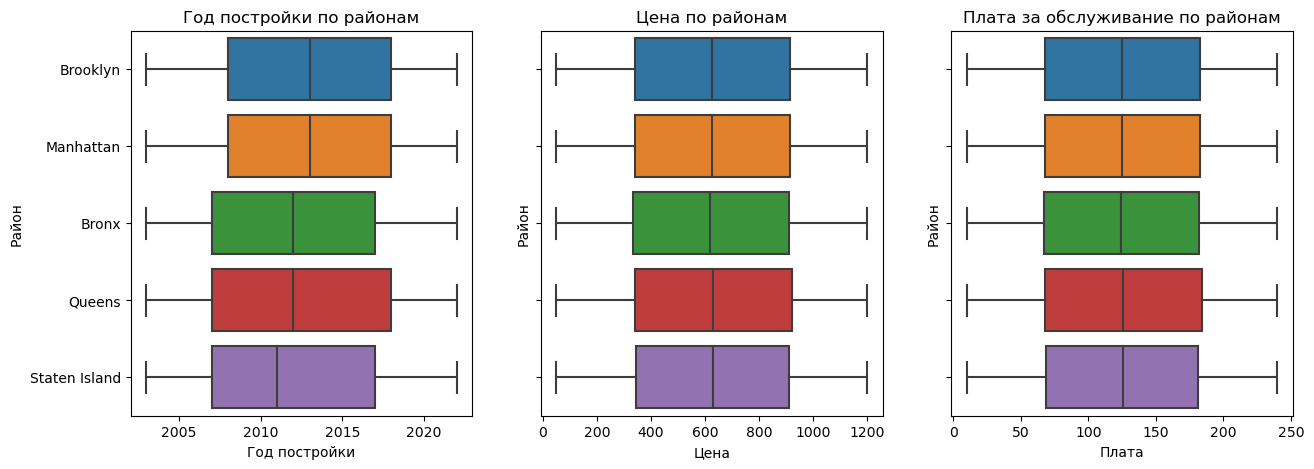

In [51]:
fig, ax = plt.subplots(1,3, figsize = (15,5), sharex = False, sharey = True)

ax[0].set_title('Год постройки по районам');
sns.boxplot(data = df, y ='neighbourhood_group', x = 'construction_year', ax = ax[0]);
ax[0].set(xlabel = 'Год постройки', ylabel = 'Район');

ax[1].set_title('Цена по районам');
sns.boxplot(data = df, y ='neighbourhood_group', x = 'price', ax = ax[1]);
ax[1].set(xlabel = 'Цена', ylabel = 'Район');

ax[2].set_title('Плата за обслуживание по районам');
sns.boxplot(data = df, y ='neighbourhood_group', x = 'service_fee', ax = ax[2]);
ax[2].set(xlabel = 'Плата', ylabel = 'Район');

### Я бы не рекомендовал заполнять пропущенные значения для приведенных выше категорий средним значением, так как значения очень разбросаны.

C:\Users\user\AppData\Local\Temp\ipykernel_3940\3664238783.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


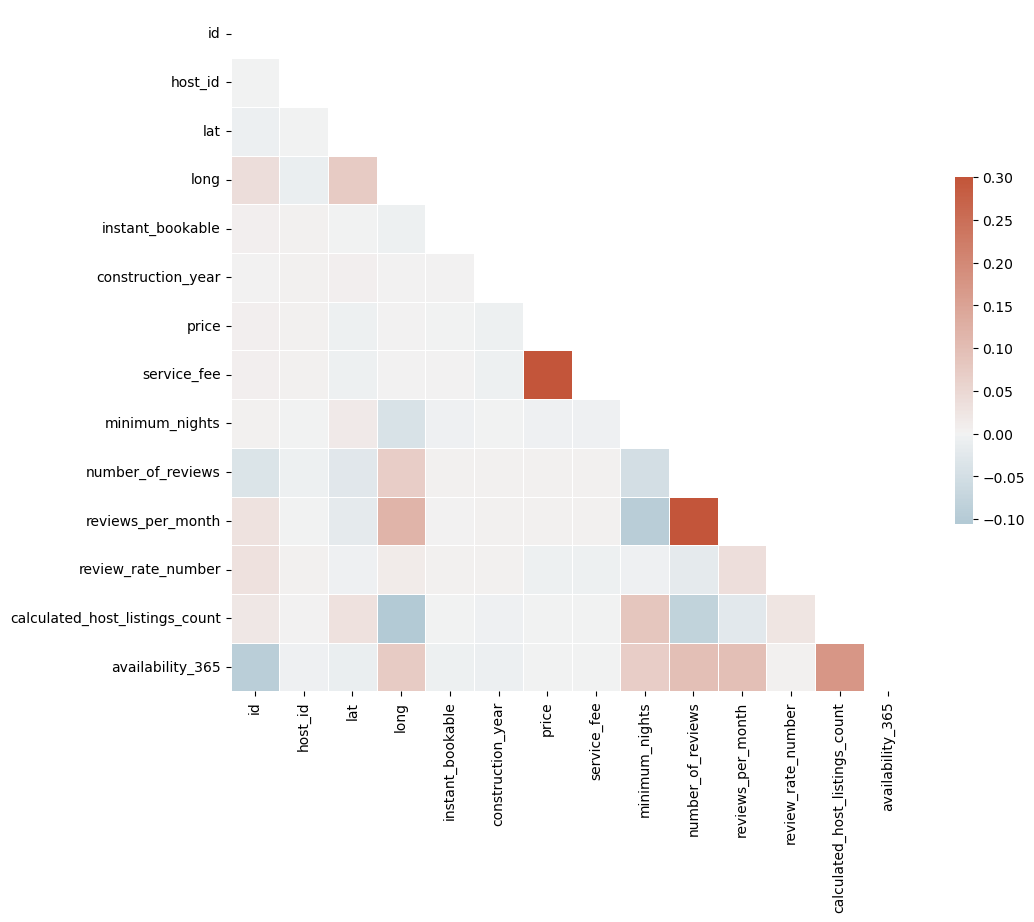

In [62]:
# Вычислить корреляционную матрицу
corr = df.corr()

# Сгенерировать маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype = bool))

# Настройка фигуры matplotlib
f, ax = plt.subplots(figsize = (11, 9))

# Сгенерировать цветовую карту
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Визуализация тепловой карты с маской и правильным соотношением сторон
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True,
           linewidths = .5, cbar_kws = {'shrink': .5});

<Axes: xlabel='price', ylabel='service_fee'>

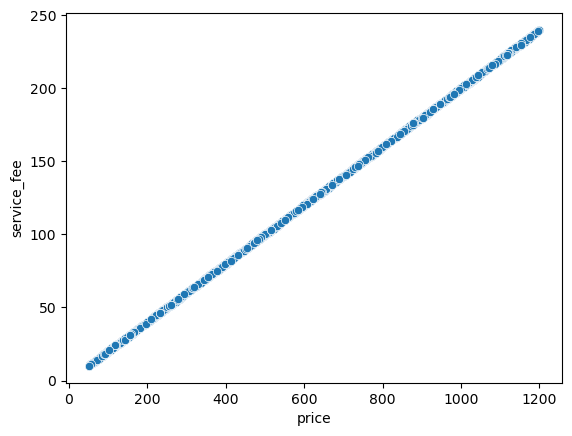

In [63]:
sns.scatterplot(data = df, x ='price', y ='service_fee')

In [64]:
# Создает фрейм данных, удаляя пропущенные цифры для price и service_fee:
train_data = df.dropna(subset = ['price', 'service_fee'])
train_data = train_data[['price', 'service_fee']]

In [65]:
#Создает фрейм данных, когда service_fee равен nan:
test_service_fee = df[['price', 'service_fee']]
test_service_fee = test_service_fee[df['service_fee'].isnull()]

# Сбрасывает nan с цены:
test_service_fee = test_service_fee.dropna(subset = ['price'])

# Создает фрейм данных, когда цена равна nan:
test_price = df[['price', 'service_fee']]
test_price = test_price[df['price'].isnull()]

# Drops nan from service_fee:
test_price = test_price.dropna(subset = ['service_fee'])

In [66]:
test_service_fee

,price,service_fee
15,578.0,NaN
16,778.0,NaN
17,656.0,NaN
18,460.0,NaN
19,1095.0,NaN
...,...,...
102053,696.0,NaN
102054,909.0,NaN
102055,387.0,NaN
102056,848.0,NaN


### Линейная регрессия для service_fee

In [67]:
X_train_fee = train_data.drop(columns = ['service_fee'])
y_train_fee = train_data['service_fee']

In [68]:
from sklearn.linear_model import LinearRegression

lr_fee = LinearRegression()
lr_fee.fit(X_train_fee, y_train_fee)

LinearRegression()

In [69]:
from sklearn.model_selection import cross_validate

# Результаты перекрестной проверки
cv_results = cross_validate(estimator = lr_fee, 
                           X = X_train_fee,
                           y= y_train_fee,
                           cv = 5)
pd.DataFrame(cv_results)

,fit_time,score_time,test_score
0,0.011970,0.001994,0.999982
1,0.011966,0.001995,0.999982
2,0.007978,0.001994,0.999982
3,0.009974,0.001995,0.999982
4,0.007977,0.002993,0.999982


In [71]:
x_test_fee = test_service_fee[['price']]

In [72]:
# Получение прогноза service_fee
y_pred_fee = lr_fee.predict(x_test_fee)
y_pred_fee

array([115.6005681 , 155.60210999, 131.20116944,  91.99965839,
       219.00455388,  17.9968059 , 178.20298116, 160.40229502,
       225.804816  , 208.8041607 , 183.4031816 ,  71.39886432,
       130.20113089,  50.39805483,  77.19908789,  22.1969678 ,
        26.99715282,  47.59794689,  99.79995906, 238.80531712,
       177.80296574, 205.80404506, 208.8041607 , 233.00509354,
       223.80473891, 232.20506271, 190.00343601,  18.39682132,
       219.80458472, 150.00189413, 103.00008241,  14.39666713,
       239.20533254,  47.99796231,  90.199589  , 139.80150094,
        76.39905705, 222.00466952, 183.60318931, 137.00139301,
       160.60230273, 104.20012866, 105.80019034,  51.59810108,
       180.20305825,  25.79710656, 112.60045246, 198.00374439,
       209.60419154,  23.19700634, 157.00216396, 126.80099983,
       128.40106151,  17.9968059 , 201.20386774, 171.20271133,
       184.00320473, 167.60257256, 218.00451534, 103.20009012,
       199.00378294, 219.20456159,  75.79903392, 187.40

In [73]:
test_service_fee['fee_pred'] = y_pred_fee
test_service_fee = test_service_fee.round(1)
test_service_fee = test_service_fee.drop(columns = ['price', 'service_fee'])

In [76]:
# Объединить данные с прогнозируемой fee платой
df = pd.concat([df, test_service_fee], axis = 1)

# Замените пропущенные значения в service_fee на fee_pred
df['service_fee'] = df['service_fee'].fillna(df.pop('fee_pred'))

### Линейная регрессия для price

In [78]:
# Разделяет x-train и y_train из train_data по цене
X_train_price = train_data.drop(columns = ['price'])
y_train_price = train_data['price']

In [79]:
lr_price = LinearRegression()
lr_price.fit(X_train_price, y_train_price)

LinearRegression()

In [80]:
# Результаты перекрестной проверки
cv_results_price = cross_validate(estimator = lr_price,
                                 X = X_train_price,
                                 y = y_train_price,
                                 cv = 5)
pd.DataFrame(cv_results_price)

,fit_time,score_time,test_score
0,0.010970,0.002991,0.999982
1,0.011970,0.001992,0.999982
2,0.007980,0.001993,0.999982
3,0.008977,0.000996,0.999982
4,0.009973,0.001994,0.999982


In [81]:
# Создает x_test из data_test_price
x_test_price = test_price[['service_fee']]

In [82]:
# Получение прогноза price
y_pred_price = lr_price.predict(x_test_price)
y_pred_price

array([ 320.01268369,  594.99706303,  879.98087435,  759.98769064,
        754.98797465,  240.01722788,  145.02262411,  280.01495579,
        415.00728746,  649.9939389 ,  135.02319213,  589.99734705,
       1089.96894585,  719.98996274,  415.00728746,  215.01864794,
        465.00444734,  250.01665986,  500.00245926,  949.97689819,
        759.98769064,  330.01211567,  559.99905112,  934.97775022,
        709.99053076,  410.00757148,   50.02802033,  390.00870752,
       1044.97150196,  884.98059034,  180.02063602,  614.99592699,
        140.02290812, 1024.97263801,  859.9820104 , 1059.97064992,
        500.00245926,  854.98229441,  564.99876711,  335.01183165,
        554.99933513, 1159.96496969,  859.9820104 ,   90.02574824,
       1019.97292202,  589.99734705,  365.01012758,  180.02063602,
        564.99876711,  974.97547813,  714.99024675,  525.0010392 ,
        919.97860226,  709.99053076,  544.99990315,  824.98399848,
        410.00757148,  360.01041159,  180.02063602,  385.00899

In [83]:
test_price['price_pred'] = y_pred_price
test_price = test_price.round(1)
test_price = test_price.drop(columns = ['price', 'service_fee'])

In [84]:
# Объединить данные с прогнозируемой price платой 
df = pd.concat([df, test_price], axis = 1)

# Замените пропущенные значения в service_fee на fee_pred
df['price'] = df['price'].fillna(df.pop('price_pred'))

In [85]:
round(df.isnull().sum()*100/len(df),2).sort_values()

id                                 0.00
host_id                            0.00
room_type                          0.00
lat                                0.00
long                               0.00
country                            0.00
country_code                       0.00
neighbourhood                      0.01
neighbourhood_group                0.02
service_fee                        0.03
price                              0.03
cancellation_policy                0.06
instant_bookable                   0.09
number_of_reviews                  0.18
construction_year                  0.20
name                               0.24
host_identity_verified             0.28
calculated_host_listings_count     0.30
review_rate_number                 0.31
minimum_nights                     0.39
host_name                          0.40
availability_365                   0.45
reviews_per_month                 15.42
last_review                       15.43
dtype: float64

### После предварительной обработки количество пропущенных значений для price и service_fee уменьшилось с 24% и 27% примерно до 3%.

In [86]:
df.nunique()

id                                99284
name                              59669
host_id                           99283
host_identity_verified                2
host_name                         12985
neighbourhood_group                   5
neighbourhood                       224
lat                               21828
long                              17704
country                               1
country_code                          1
instant_bookable                      2
cancellation_policy                   3
room_type                             4
construction_year                    20
price                              1151
service_fee                         396
minimum_nights                      140
number_of_reviews                   476
last_review                        2453
reviews_per_month                  1016
review_rate_number                    5
calculated_host_listings_count       78
availability_365                    376
dtype: int64

### Предварительный анализ

### Цена в зависимости от района и в зависимости от типа номера

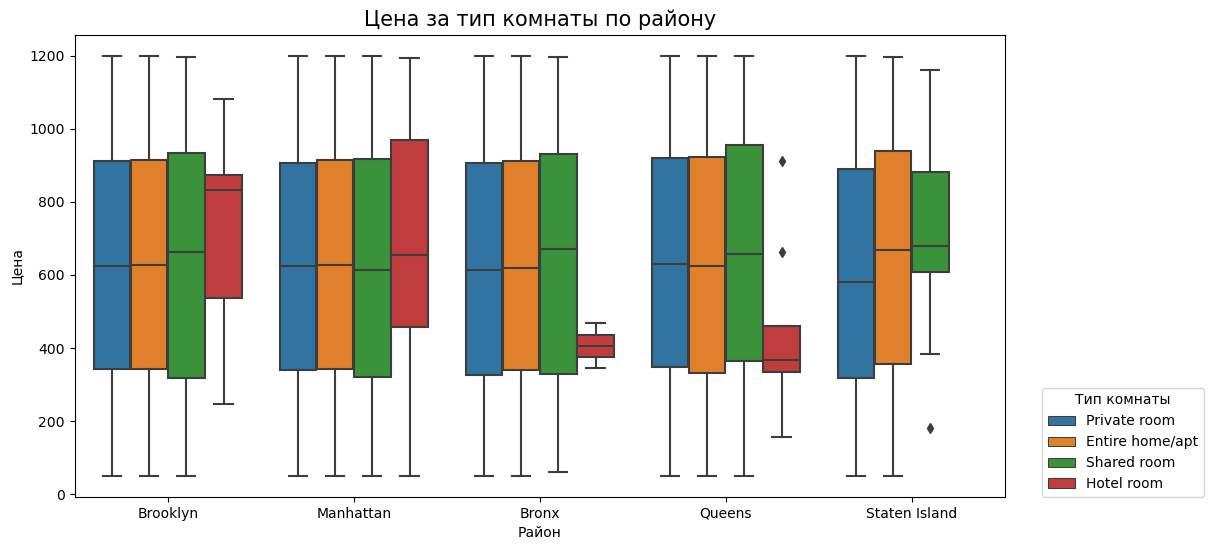

In [91]:
plt.figure(figsize = (12,6))

a = sns.boxplot(data = df, y = 'price', x ='neighbourhood_group', hue = 'room_type');
a.set_title('Цена за тип комнаты по району', size = 15)
a.set(xlabel = 'Район', ylabel = 'Цена');

a.legend(title="Тип комнаты", bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0);

###### Средняя цена почти одинакова, независимо от типа номера или местоположения, за редким исключением. Например, стоимость гостиничного номера в Бруклине может быть дороже, чем в Квинсе.

### Количество типов комнат

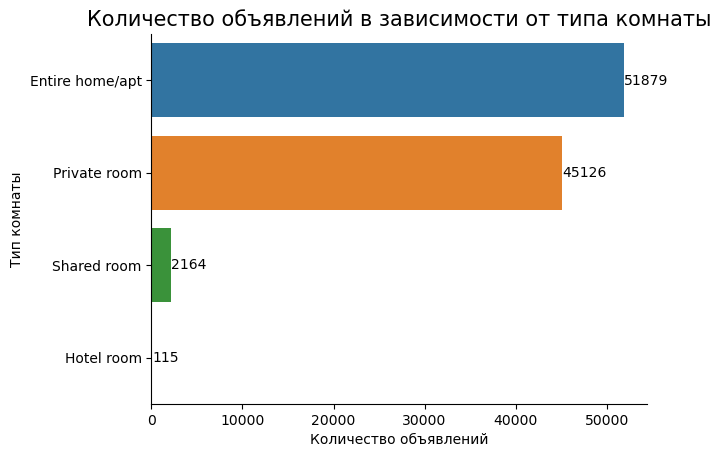

In [92]:
ax = sns.countplot(y = df['room_type'], order = df['room_type'].value_counts().index);
ax.set_title('Количество объявлений в зависимости от типа комнаты', size = 15)
ax.set(xlabel = 'Количество объявлений', ylabel = 'Тип комнаты');

sns.despine()

abs_values = df['room_type'].value_counts(ascending = False).values

ax.bar_label(container = ax.containers[0], labels = abs_values);

In [110]:
print(f'Всего постов о сдаче комнат: {df["room_type"].count()}')
print(f'Постов о сдаче всего дома/квартиры: {len(df[df["room_type"] == "Entire home/apt"])} или {round(len(df[df["room_type"]=="Entire home/apt"])/df["room_type"].count()*100,2)}%')

Всего постов о сдаче комнат: 99284
Постов о сдаче всего дома/квартиры: 51879 или 52.25%


In [111]:
print(f'Постов о сдаче отдельной комнаты: {len(df[df["room_type"] == "Private room"])} или {round(len(df[df["room_type"]=="Private room"])/df["room_type"].count()*100,2)}%')

Постов о сдаче отдельной комнаты: 45126 или 45.45%


In [112]:
print(f'Постов о сдаче общей комнаты: {len(df[df["room_type"] == "Shared room"])} или {round(len(df[df["room_type"]=="Shared room"])/df["room_type"].count()*100,2)}%')

Постов о сдаче общей комнаты: 2164 или 2.18%


In [114]:
print(f'Постов о сдаче гостиничных номеров: {len(df[df["room_type"] == "Hotel room"])} или {round(len(df[df["room_type"]=="Hotel room"])/df["room_type"].count()*100,2)}%')

Постов о сдаче гостиничных номеров: 115 или 0.12%


In [117]:
print(f"Средняя цена за ночь ${round(df['price'].mean(),2)}")

Средняя цена за ночь $625.63


In [118]:
nights_booked = df['minimum_nights'].mean().astype(int)
print(f'Среднее минимальное количество дней составляет {nights_booked} дней')

Среднее минимальное количество дней составляет 8 дней


### Брони комнат

[Text(0.5, 0, 'Количество забронированных комнат'),
 Text(0, 0.5, 'Количество броней')]

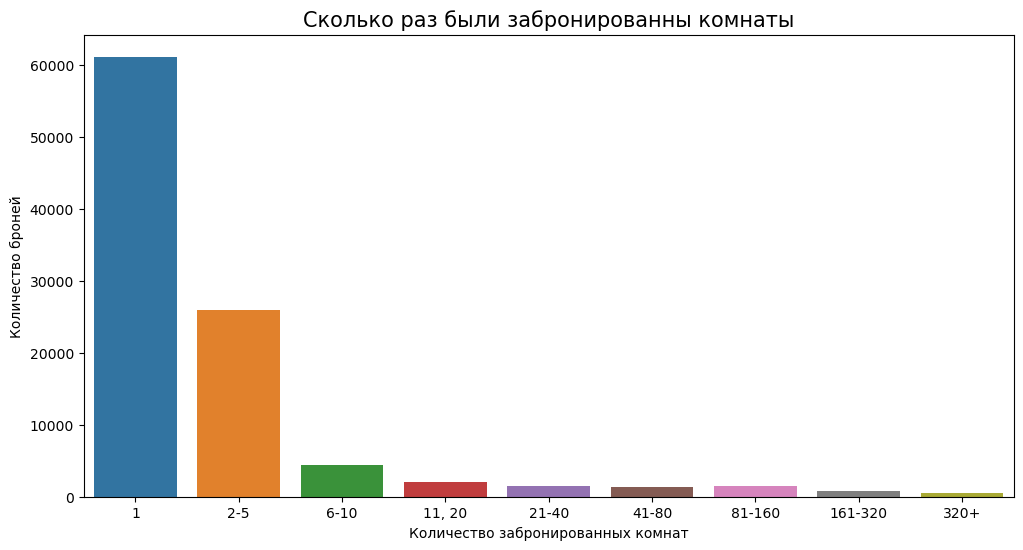

In [123]:
bins = [0, 1, 5, 10, 20, 40, 80, 160, 320, 500]
labels = ['1', '2-5', '6-10', '11, 20', '21-40', '41-80', '81-160', '161-320', '320+']
df['bins'] = pd.cut(x = df['calculated_host_listings_count'], bins=bins, labels = labels)

plt.figure(figsize = (12,6))
a = sns.countplot(x =df['bins']);
a.set_title('Сколько раз были забронированны комнаты', size = 15)
a.set(xlabel = 'Количество забронированных комнат', ylabel = 'Количество броней')